Exercise 1 - Basic Algorithms


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

1.1

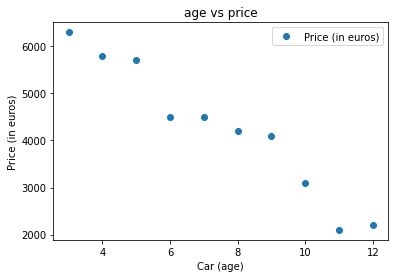

In [2]:
#visualisierung

cars = pd.DataFrame(data={'Car (age)': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'Price (in euros)': [6300, 5800, 5700, 4500, 4500, 4200, 4100, 3100, 2100, 2200]})
cars.describe()
cars.plot(x='Car (age)', y='Price (in euros)', style='o')
plt.title('age vs price')
plt.xlabel('Car (age)')
plt.ylabel('Price (in euros)')
plt.show()

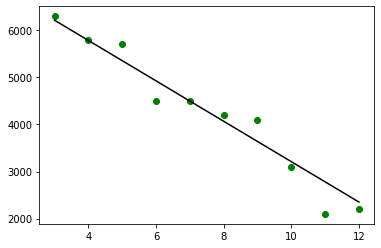

,Actual,Predicted
0,5700,5356.751468
1,2100,2781.800391


In [3]:
#linear regression model

x = cars.iloc[:, :-1].values
y = cars.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lm = LinearRegression()
lm.fit(X_train, y_train)

# plot
plt.scatter(x, y,color='g')
plt.plot(x, lm.predict(x),color='k')

plt.show()
y_pred = lm.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

In [4]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-429.15851272]
Mean squared error: 291335.66
Coefficient of determination: 0.91


1.2

In [5]:
household_income = pd.read_csv('Household_income.csv')
household_income.head()


,Age,Relative Income
0,20,100.0
1,21,107.5
2,22,122.2
3,23,138.0
4,24,155.7


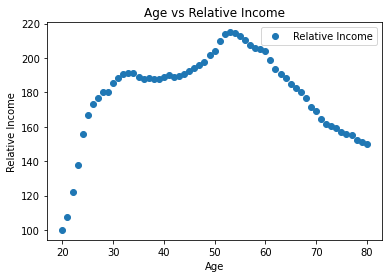

In [6]:
#visualise

household_income.describe()
household_income.plot(x='Age', y='Relative Income', style='o')
plt.title('Age vs Relative Income')
plt.xlabel('Age')
plt.ylabel('Relative Income')
plt.show()

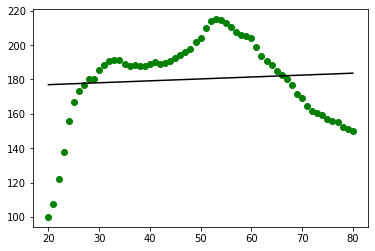

[179.72379541 180.83746903]


In [7]:
#linear regression model

x = household_income.iloc[:, :-1].values
y = household_income.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lm = LinearRegression()
lm.fit(X_train, y_train)

# plot
plt.scatter(x, y,color='g')
plt.plot(x, lm.predict(x),color='k')

plt.show()
y_pred = lm.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
pred_45_55 = lm.predict([[45], [55]])
print(pred_45_55)

1.3

In [8]:
store_statistics = pd.DataFrame(data={'Time Spent on the website (min)': [3, 12, 2.1, 2.6, 1.4, 5, 4, 2, 6, 0.8], 'Bought something': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No']})

<AxesSubplot:xlabel='Time Spent on the website (min)'>

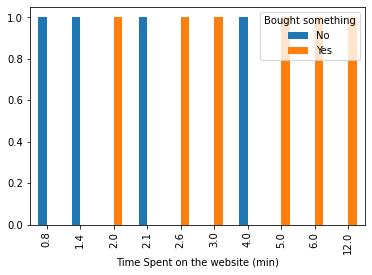

In [9]:
#visualise

store_statistics.describe()
store_statistics = store_statistics.sort_values(by=['Time Spent on the website (min)'])
df = store_statistics.groupby(['Time Spent on the website (min)','Bought something']).size()
df = df.unstack()
df.plot(kind='bar')


In [10]:

#logistic regression model

x = store_statistics.iloc[:, :-1].values
y = store_statistics.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
pred = model.predict([[2.3]])
print(pred)


['Yes']


1.4

In [15]:
#preprocessing
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)


#K-NN

model = KNeighborsClassifier(n_neighbors=3)


model.fit(x, y_encoded)

pred = model.predict([[1.8]])
print(pred)

[0]
